Consider the case $f(x)=2x$.

For $f(x)=2x$, $N_{train}$=10 and $\sigma=0$, train a linear, third order polynomial and
tenth order polynomial) for a training set when $x_i \in [0,1]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
def f(x,sgma):
    return 2*x +sgma*np.random.rand(len(x))

In [3]:
x=np.linspace(0.05,0.95,10)
y=f(x,0)

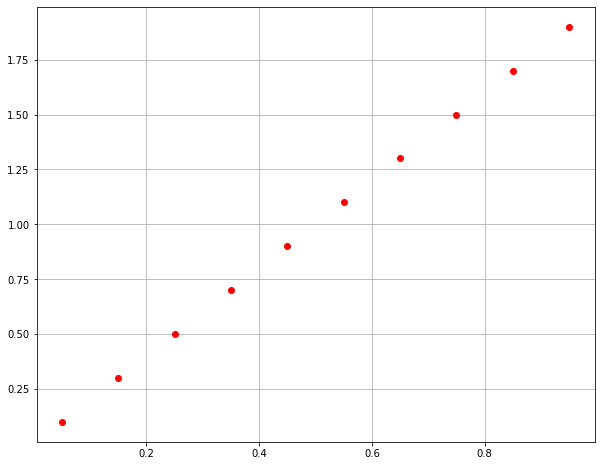

In [4]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro')
plt.grid()

In [5]:
x1=x[:,np.newaxis]
y1=y[:,np.newaxis]

In [6]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
xtest=np.random.uniform(0,1,10)

In [8]:
xtest.sort()

In [9]:
xtest=xtest[:,np.newaxis]

In [10]:
y_pred=model1.predict(xtest)

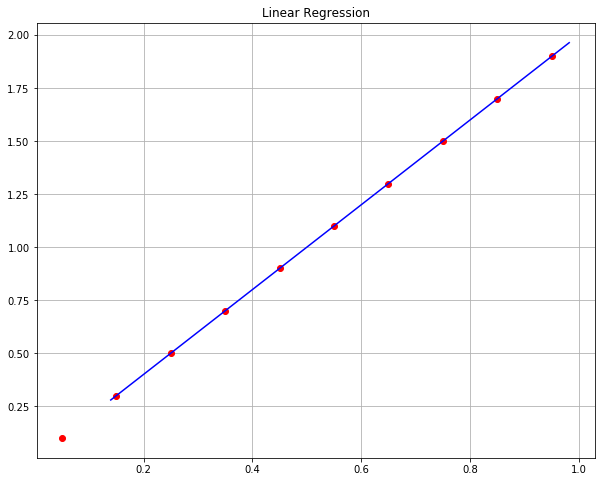

In [11]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro')
plt.plot(xtest,y_pred,'b')
plt.title('Linear Regression')
plt.grid()

In [12]:
#polynomial 
polynomial_features1=PolynomialFeatures(degree=3)
x_poly=polynomial_features1.fit_transform(x1)

In [13]:
x_poly

array([[1.00000e+00, 5.00000e-02, 2.50000e-03, 1.25000e-04],
       [1.00000e+00, 1.50000e-01, 2.25000e-02, 3.37500e-03],
       [1.00000e+00, 2.50000e-01, 6.25000e-02, 1.56250e-02],
       [1.00000e+00, 3.50000e-01, 1.22500e-01, 4.28750e-02],
       [1.00000e+00, 4.50000e-01, 2.02500e-01, 9.11250e-02],
       [1.00000e+00, 5.50000e-01, 3.02500e-01, 1.66375e-01],
       [1.00000e+00, 6.50000e-01, 4.22500e-01, 2.74625e-01],
       [1.00000e+00, 7.50000e-01, 5.62500e-01, 4.21875e-01],
       [1.00000e+00, 8.50000e-01, 7.22500e-01, 6.14125e-01],
       [1.00000e+00, 9.50000e-01, 9.02500e-01, 8.57375e-01]])

In [14]:
model2=LinearRegression()
model2.fit(x_poly,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pol3=model2.predict(x_poly)

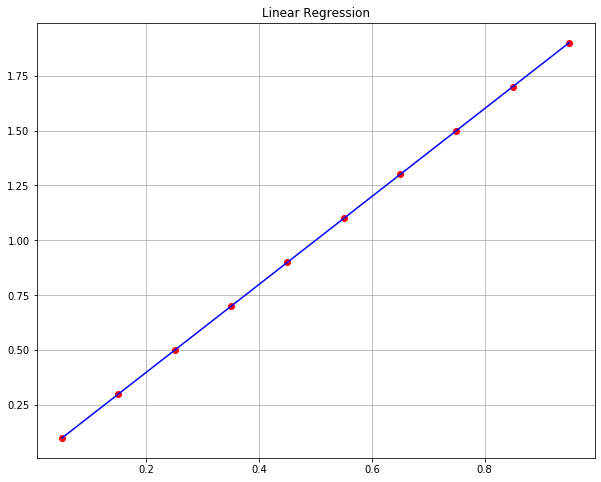

In [16]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro')
plt.plot(x,y_pol3,'b')
plt.title('Linear Regression')
plt.grid()

In [17]:
polynomial_features2=PolynomialFeatures(degree=10)
x_poly1=polynomial_features2.fit_transform(x1)

In [18]:
model3=LinearRegression()
model3.fit(x_poly1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pol4=model3.predict(x_poly1)

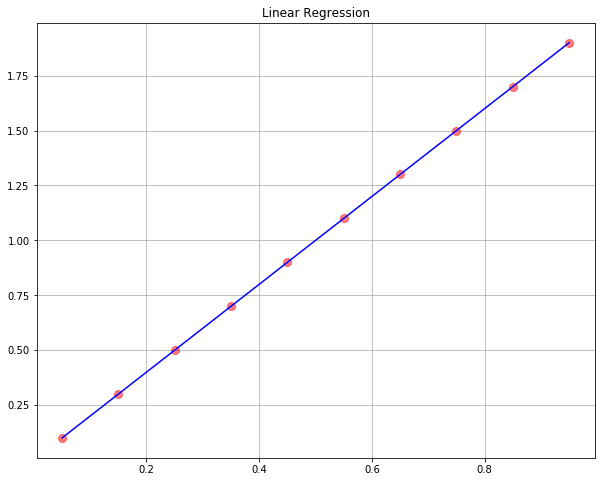

In [20]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro',ms=8,alpha=0.5)
plt.plot(x,y_pol4,'b-')
plt.title('Linear Regression')
plt.grid()

In [21]:
x_test=np.random.uniform(0,1.2,20)
x_test1=x_test[:,np.newaxis]
x_tpoly1=polynomial_features2.fit_transform(x_test1)

In [22]:
y_polPre=model3.predict(x_tpoly1)

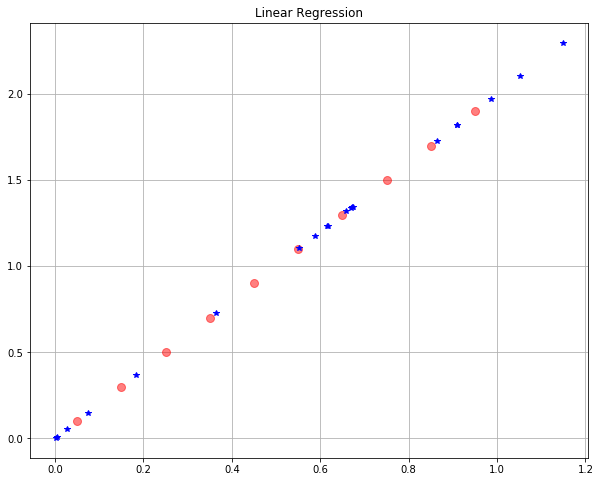

In [23]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro',ms=8,alpha=0.5)
plt.plot(x_test,y_polPre,'b*')
plt.title('Linear Regression')
plt.grid()

In [24]:
#Now introducing some noise in the data

In [25]:
def fs(N_t,sigma):
    x=np.linspace(0.01,0.98,N_t)
    return (x,2*x+sigma*np.random.randn(N_t))

In [44]:
x_t1,y_t1=fs(10,1)

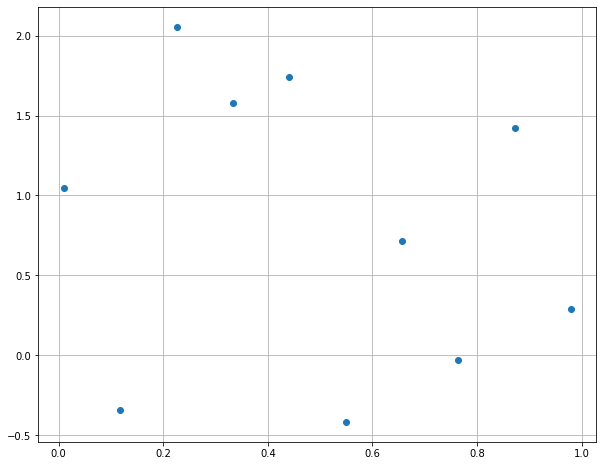

In [45]:
plt.figure(figsize=(10,8))
plt.plot(x_t1,y_t1,'o')
plt.grid()

In [46]:
clf=LinearRegression()
clf.fit(x_t1[:,np.newaxis],y_t1)
xpred=np.linspace(0.01,0.99,500)
ypred1=clf.predict(xpred[:,np.newaxis])
#-----------------------------------
poly3=PolynomialFeatures(3)
X=poly3.fit_transform(x_t1[:,np.newaxis])
clf3=LinearRegression()
clf3.fit(X,y_t1)
X3=poly3.fit_transform(xpred[:,np.newaxis])
ypred2=clf3.predict(X3)
#-----------------------------------
poly10=PolynomialFeatures(15)
X10=poly10.fit_transform(x_t1[:,np.newaxis])
clf10=LinearRegression()
clf10.fit(X10,y_t1)
X01=poly10.fit_transform(xpred[:,np.newaxis])
ypred3=clf10.predict(X01)

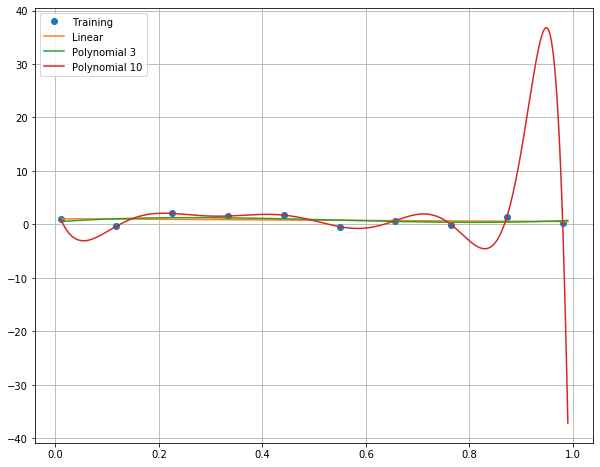

In [47]:
plt.figure(figsize=(10,8))
plt.plot(x_t1,y_t1,'o',label='Training')
plt.plot(xpred,ypred1,label='Linear')
plt.plot(xpred,ypred2,label='Polynomial 3')
plt.plot(xpred,ypred3,label='Polynomial 10')
plt.legend()
plt.grid()